<a href="https://colab.research.google.com/github/marcelounb/BB/blob/master/ia_mobile2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import os
from google.colab import files
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
import tensorflow as tf

In [4]:
path = "/content/fulldataset.xlsx"

# Importing using pandas

In [5]:
dataset = pd.read_excel(path, sheet_name=0, header=0 )

# Just extract out sentences and labels first - we will create subwords here
automatico = dataset['Responsável'].tolist()
negocial = dataset['Natureza'].tolist()
classificacao = dataset['Classificação'].tolist()
produtos_servicos = dataset['Produtos/Serviços'].tolist()
detalhamento = dataset['Detalhamento'].tolist()
review = dataset['review'].tolist()
score = dataset['score'].tolist()

In [6]:
dataset.keys()

Index(['Responsável', 'Natureza', 'Classificação', 'Produtos/Serviços',
       'Detalhamento', 'Descrição do Problema', 'Produtos/Serviços 2',
       'Detalhamento 2', 'Descrição do Problema 2', 'Produtos/Serviços 3',
       'Detalhamento 3', 'Descrição do Problema 3', 'id', 'userName',
       'userImage', 'review', 'score', 'thumbsUpCount', 'appVersion', 'date',
       'reply', 'replyDate'],
      dtype='object')

In [25]:
dataset.head(3)

,Responsável,Natureza,Classificação,Produtos/Serviços,Detalhamento,Descrição do Problema,Produtos/Serviços 2,Detalhamento 2,Descrição do Problema 2,Produtos/Serviços 3,Detalhamento 3,Descrição do Problema 3,id,userName,userImage,review,score,thumbsUpCount,appVersion,date,reply,replyDate
0,Automático,Opinião,Elogio,Aplicativo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,gp:AOqpTOHW8MJYDva4_p6rm2zYGAr7hZNKClnjnUTt1Cs...,SILVIO LORENÇO LORETO,https://lh3.googleusercontent.com/a-/AOh14GgK9...,O aplicativo possibilita fazer todas as movime...,5,0,7.26.8.1,2020-09-03 08:13:05,NaN,NaT
1,Automático,Opinião,Elogio,Aplicativo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,gp:AOqpTOHu1Wfs6GT2fvSuPhBE8TH0pP4KcSnL0HQ3V2C...,Leda Martins,https://play-lh.googleusercontent.com/-TjnnwBM...,Bom,1,0,7.26.8.1,2020-09-03 08:12:45,NaN,NaT
2,Automático,Opinião,Elogio,Aplicativo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,gp:AOqpTOH5bmqxGkXO6ZMaDvNST9WoIdj8HTsOEUdWsmL...,Renato Felipe,https://lh3.googleusercontent.com/a-/AOh14GjJY...,"Muito bom, gosto muito",5,0,7.26.8.1,2020-09-03 08:11:19,NaN,NaT


In [8]:
review[0:5]

['O aplicativo possibilita fazer todas as movimentações e acompanhar seu andamento. È fàcil de utilizar, ràpido e possue todas as informações necessàrias ao cliente.',
 'Bom',
 'Muito bom, gosto muito',
 'Muito bom',
 'Muito bom tem me ajudado muito pois faço tudo sem precisar sair de casa👏👏👏👏👏']

# Reduzindo o texto (retirando artigos, pontuacao e conjuncao 'e')

In [9]:
def reduzir_texto(frases):
  frase = ''
  for item in frases.lower().split():
    if item not in ['a', 'o', 'as', 'os', 'da', 'do', 'das', 'dos', 'e']:  # retira os artigos e conjuncao 'e'
      if item[-1] in ['.', ',', '!', ';' ]:
        frase +=str(item[0:-1])+' '  # retira pontuacao
      else:
        frase +=str(item)+' '

  return frase[:-1]

In [10]:
review_reduzida = []
for item in review:
  review_reduzida.append(reduzir_texto(item))

In [11]:
review[0:5]

['O aplicativo possibilita fazer todas as movimentações e acompanhar seu andamento. È fàcil de utilizar, ràpido e possue todas as informações necessàrias ao cliente.',
 'Bom',
 'Muito bom, gosto muito',
 'Muito bom',
 'Muito bom tem me ajudado muito pois faço tudo sem precisar sair de casa👏👏👏👏👏']

In [12]:
review_reduzida[0:5]

['aplicativo possibilita fazer todas movimentações acompanhar seu andamento è fàcil de utilizar ràpido possue todas informações necessàrias ao cliente',
 'bom',
 'muito bom gosto muito',
 'muito bom',
 'muito bom tem me ajudado muito pois faço tudo sem precisar sair de casa👏👏👏👏👏']

In [13]:
def calcula(totalreview):
  total, max, i = 0, 0, 0
  for item in totalreview:
    total += len(item)
    i+=1
    if len(item)> max:
      max = len(item)
  media = total/i
  print("Tamanho Médio dos reviews = " + str(media))
  print("Maior review = " + str(max) + " caracteres")
  print("Total de caracteres = ", str(total))
  return int(max)

In [14]:
print('Review completo:')
max = calcula(review)
print('-------------------')
print('Review reduzido:')
calcula(review_reduzida)

Review completo:
Tamanho Médio dos reviews = 43.18304431599229
Maior review = 1074 caracteres
Total de caracteres =  224120
-------------------
Review reduzido:
Tamanho Médio dos reviews = 40.51271676300578
Maior review = 1027 caracteres
Total de caracteres =  210261


1027

In [15]:
max

1074

In [16]:
tamanhoreviews_lista = []
for item in range(max+1):
  tamanhoreviews_lista.append(0)
len(tamanhoreviews_lista)

1075

In [17]:
for item in review:
  tamanhoreviews_lista[len(item)]+=1

In [18]:
tamanhoreviews_lista = pd.DataFrame(tamanhoreviews_lista, columns=['Tamanho das Reviews'])
tamanhoreviews_lista.keys()

Index(['Tamanho das Reviews'], dtype='object')

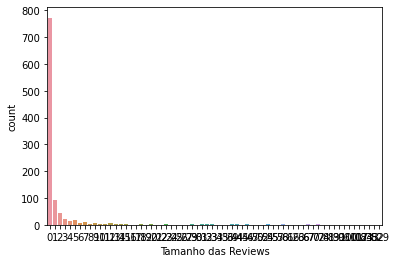

In [19]:
sns.countplot(x='Tamanho das Reviews', data=tamanhoreviews_lista, )

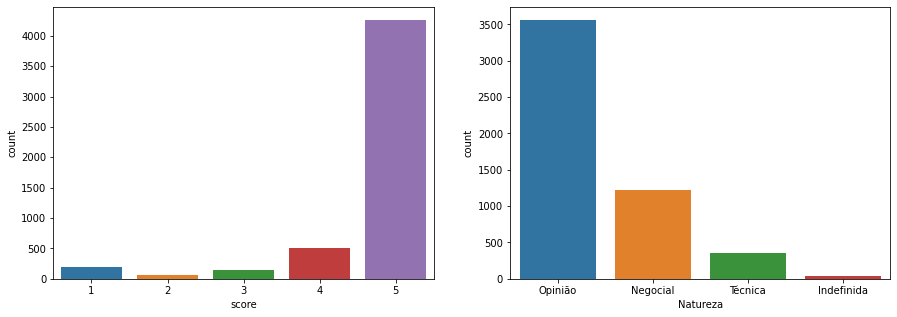

In [20]:
fig, ax =plt.subplots(1,2, figsize=(15,5))
sns.countplot(x=dataset['score'], ax=ax[0])
sns.countplot(x=dataset['Natureza'], ax=ax[1])
fig.show()

In [21]:
print(dataset['score'].value_counts())
print('------------------------------')
print(dataset['Natureza'].value_counts())

5    4260
4     515
1     200
3     149
2      66
Name: score, dtype: int64
------------------------------
Opinião       3562
Negocial      1223
Técnica        361
Indefinida      44
Name: Natureza, dtype: int64


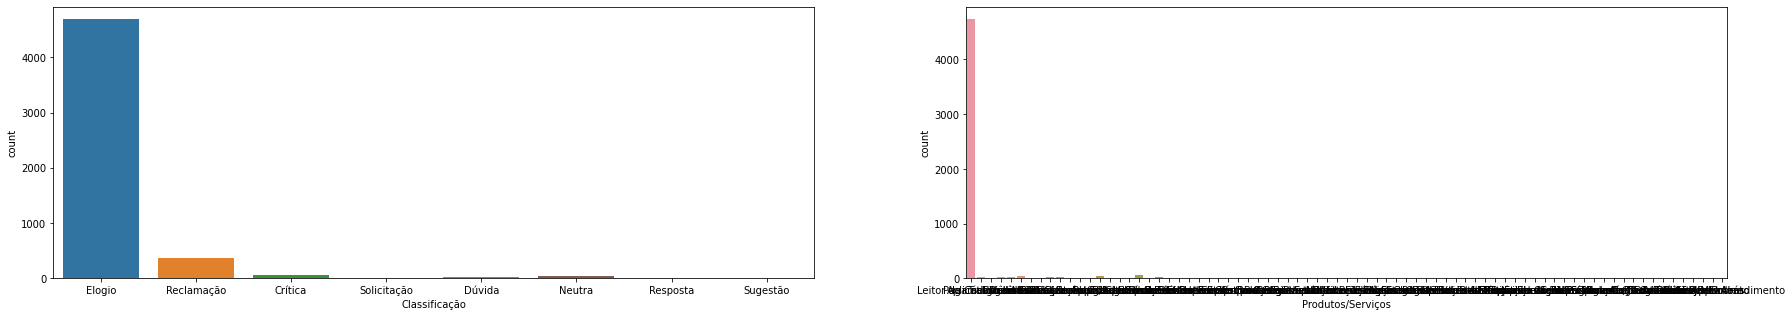

In [22]:
fig, ax =plt.subplots(1,2, figsize=(30,5))
sns.countplot(x=dataset['Classificação'], ax=ax[0])
sns.countplot(x=dataset['Produtos/Serviços'], ax=ax[1])
fig.show()

In [23]:
print(dataset['Classificação'].value_counts())
print('------------------------------')
print(dataset['Produtos/Serviços'].value_counts())

Elogio         4684
Reclamação      362
Crítica          62
Neutra           42
Dúvida           18
Sugestão         10
Solicitação       6
Resposta          6
Name: Classificação, dtype: int64
------------------------------
Aplicativo                   4731
Empresa                        69
Atendimento                    42
Abertura Conta Fácil           40
Leitor de Código de Barra      28
                             ... 
Extrato de Poupança             1
Financiamento de Imóvel         1
INSS - Benefício                1
Cadastro de Senha               1
Pagamento do Boleto             1
Name: Produtos/Serviços, Length: 77, dtype: int64


# Creating the Test and Validation Datasets

In [24]:
dataset2 = pd.DataFrame(dataset, columns=['score', 'review', 'Natureza', 'Classificação', 'Produtos/Serviços','Detalhamento', 'Descrição do Problema'])
dataset2[0:5]

,score,review,Natureza,Classificação,Produtos/Serviços,Detalhamento,Descrição do Problema
0,5,O aplicativo possibilita fazer todas as movime...,Opinião,Elogio,Aplicativo,NaN,NaN
1,1,Bom,Opinião,Elogio,Aplicativo,NaN,NaN
2,5,"Muito bom, gosto muito",Opinião,Elogio,Aplicativo,NaN,NaN
3,4,Muito bom,Opinião,Elogio,Aplicativo,NaN,NaN
4,5,Muito bom tem me ajudado muito pois faço tudo ...,Opinião,Elogio,Aplicativo,NaN,NaN


In [26]:
dataset_natureza = pd.DataFrame(dataset, columns=['score', 'review', 'Natureza'])
dataset_natureza[0:5]

,score,review,Natureza
0,5,O aplicativo possibilita fazer todas as movime...,Opinião
1,1,Bom,Opinião
2,5,"Muito bom, gosto muito",Opinião
3,4,Muito bom,Opinião
4,5,Muito bom tem me ajudado muito pois faço tudo ...,Opinião
